# Multiclass Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [4]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Seperate X and Y

In [6]:
X = df.drop(columns=['id', 'NObeyesdad'])
Y = df[['NObeyesdad']]

In [7]:
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation


In [8]:
Y.head()

,NObeyesdad
0,Overweight_Level_II
1,Normal_Weight
2,Insufficient_Weight
3,Obesity_Type_III
4,Overweight_Level_II


In [9]:
Y.value_counts()

NObeyesdad         
Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: count, dtype: int64

<Axes: xlabel='NObeyesdad'>

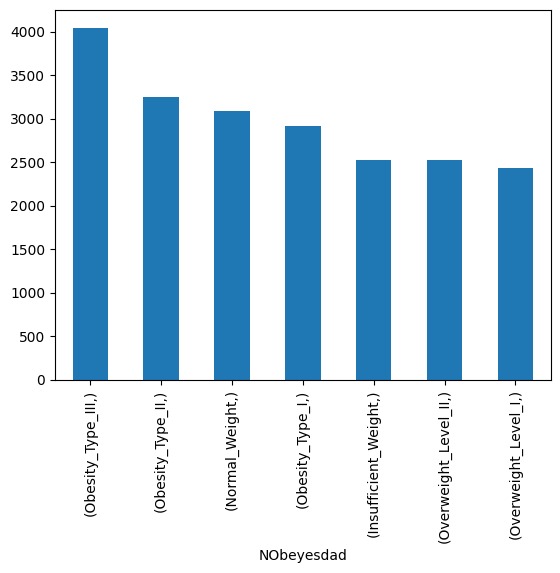

In [10]:
Y.value_counts().plot(kind='bar')

### Seperate cat and con on X feature

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [13]:
con

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

### Apply Preprocessing on X Feature

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [15]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])
cat_pipe = Pipeline(steps=([('impute', SimpleImputer(strategy='most_frequent')),
                            ('ohe',OneHotEncoder(handle_unknown='ignore',sparse_output=False))]))
pre = ColumnTransformer([('con',num_pipe,con),('cat',cat_pipe,cat)]).set_output(transform='pandas')

In [16]:
X_pre = pre.fit_transform(X)
X_pre.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Apply Ordinal Encoder on Y Feature

In [17]:
from sklearn.preprocessing import OrdinalEncoder
ord = OrdinalEncoder().set_output(transform='pandas')
Y_ord = ord.fit_transform(Y)
Y_ord[0:5]

,NObeyesdad
0,6.0
1,1.0
2,0.0
3,4.0
4,6.0


### Apply Train Test Split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y_ord, test_size=0.2, random_state=42)

In [19]:
xtrain.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
9958,-1.202863,0.798937,0.345438,1.039171,0.338364,-0.048349,2.407607,0.636513,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7841,-0.206438,0.608684,-1.251408,-0.836279,1.756085,-0.048349,1.214691,0.636513,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9293,-0.352234,1.370087,1.294114,1.039171,0.169396,-0.631241,-0.288525,-1.024344,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
15209,3.016595,-1.377221,-0.299019,-0.836279,0.338364,-1.691863,-1.171141,-1.024344,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
16515,-0.147998,1.142541,0.269619,1.039171,0.338364,1.595165,1.214691,0.636513,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
ytrain.head()

,NObeyesdad
9958,2.0
7841,0.0
9293,3.0
15209,2.0
16515,6.0


In [21]:
xtest.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
10317,0.379434,-0.584893,0.911536,1.039171,0.338364,-1.211170,-1.093287,0.157075,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4074,-1.027052,0.569868,-0.299019,-0.836279,0.338364,-0.048349,0.021775,0.636513,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9060,-0.084652,0.150442,-0.120003,0.814419,0.338364,1.344141,1.214691,-1.020025,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
11286,1.083034,-0.338770,0.914090,-1.638904,0.338364,-0.042493,-1.171141,-0.834247,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
8254,-1.202863,-1.033617,-1.436296,-0.836279,0.338364,-0.048349,-1.171141,2.297369,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [22]:
ytest.head()

,NObeyesdad
10317,4.0
4074,5.0
9060,2.0
11286,3.0
8254,0.0


In [23]:
xtrain.shape

(16606, 30)

In [24]:
xtest.shape

(4152, 30)

In [25]:
ytrain.value_counts()

NObeyesdad
4.0           3242
3.0           2591
1.0           2456
2.0           2367
6.0           2008
0.0           1999
5.0           1943
Name: count, dtype: int64

In [26]:
ytest.value_counts()

NObeyesdad
4.0           804
3.0           657
1.0           626
2.0           543
0.0           524
6.0           514
5.0           484
Name: count, dtype: int64

### Convert Target Feature to_categorical

In [27]:
from keras.utils import to_categorical
ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytest)

In [28]:
ytrain_cat

array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [29]:
ytest_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Create Neural Network

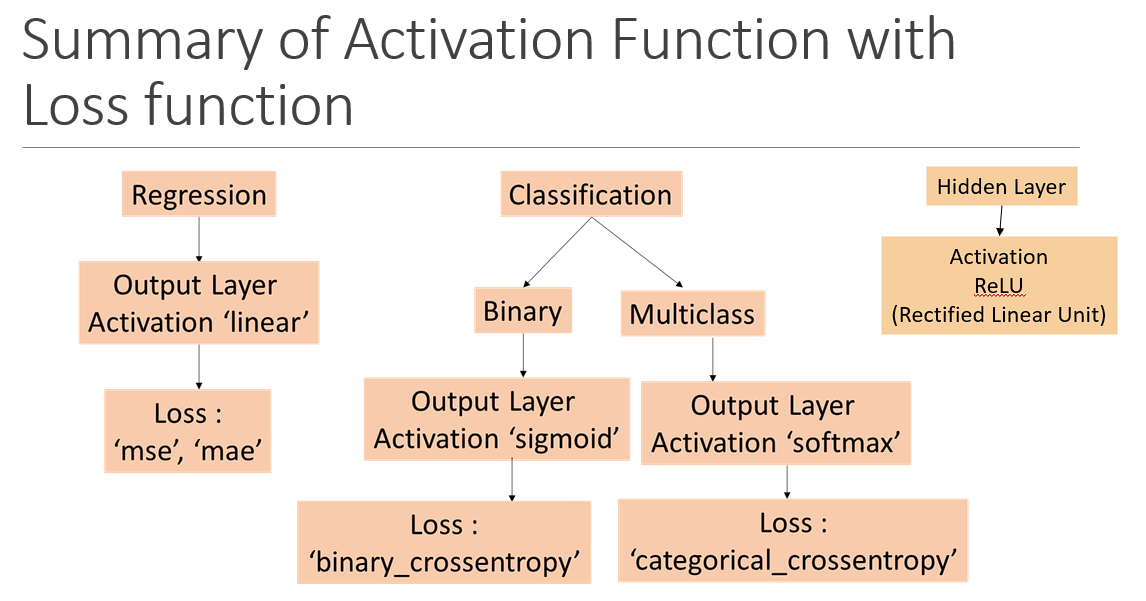

In [30]:
xtrain.shape[1]

30

In [31]:
ytrain.value_counts()

NObeyesdad
4.0           3242
3.0           2591
1.0           2456
2.0           2367
6.0           2008
0.0           1999
5.0           1943
Name: count, dtype: int64

In [32]:
ytrain_cat.shape

(16606, 7)

In [33]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [34]:
# create a model
model = Sequential()

# add a first hidden layer
model.add(Dense(64, activation='relu', input_shape= (xtrain.shape[1],)))
model.add(Dropout(0.4))

# add a second hidden layer
model.add(Dense(32, activation= 'relu'))
model.add(Dropout(0.3))

# final output layer
model.add(Dense(7, activation='softmax'))


In [35]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'] )

In [36]:
earlystop = EarlyStopping(monitor='val_loss', patience=10)

### fit the model

In [37]:
hist = model.fit(xtrain, ytrain_cat,
                 validation_split=0.2,
                 epochs=400,
                 callbacks=[earlystop])

Epoch 1/400


416/416 [==============================] - 4s 4ms/step - loss: 1.2099 - accuracy: 0.5211 - val_loss: 0.7220 - val_accuracy: 0.7261
Epoch 2/400
416/416 [==============================] - 1s 3ms/step - loss: 0.7962 - accuracy: 0.6736 - val_loss: 0.5642 - val_accuracy: 0.8079
Epoch 3/400
416/416 [==============================] - 1s 3ms/step - loss: 0.6901 - accuracy: 0.7235 - val_loss: 0.4954 - val_accuracy: 0.8173
Epoch 4/400
416/416 [==============================] - 1s 3ms/step - loss: 0.6226 - accuracy: 0.7581 - val_loss: 0.4689 - val_accuracy: 0.8320
Epoch 5/400
416/416 [==============================] - 1s 3ms/step - loss: 0.6018 - accuracy: 0.7701 - val_loss: 0.4428 - val_accuracy: 0.8468
Epoch 6/400
416/416 [==============================] - 1s 3ms/step - loss: 0.5668 - accuracy: 0.7872 - val_loss: 0.4174 - val_accuracy: 0.8561
Epoch 7/400
416/416 [==============================] - 1s 3ms/step - loss: 0.5500 - accuracy: 0.7961 - val_loss: 0.4008 - val_accuracy: 0.86

### evaluate model

In [38]:
model.evaluate(xtrain, ytrain_cat)

519/519 [==============================] - 1s 2ms/step - loss: 0.3355 - accuracy: 0.8844


[0.3354846239089966, 0.8844393491744995]

In [39]:
model.evaluate(xtest, ytest_cat)

130/130 [==============================] - 0s 2ms/step - loss: 0.3670 - accuracy: 0.8711


[0.3669963777065277, 0.8711464405059814]

### Plot the learning curve

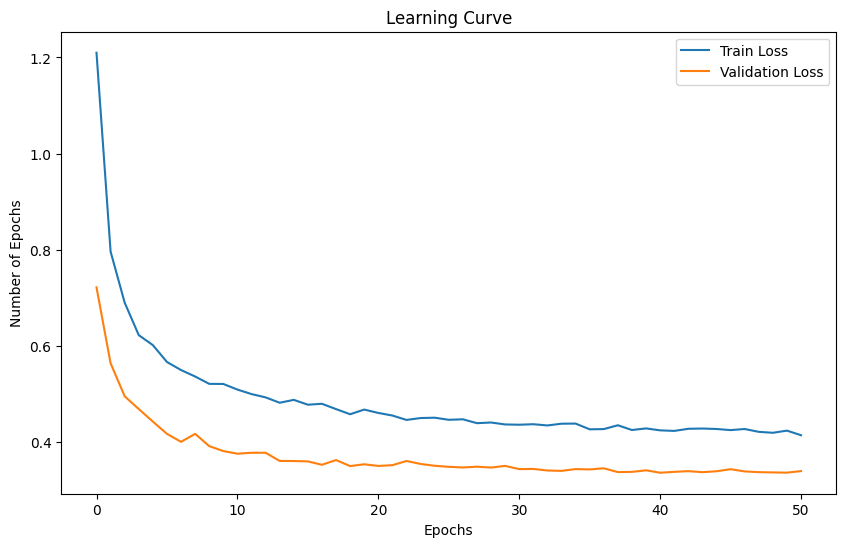

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(hist.history['loss'], label='Train Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Number of Epochs')
plt.title('Learning Curve')
plt.legend()
plt.show()

### Predict the Probability for Train and Test

In [41]:
yprob_tr = model.predict(xtrain)
yprob_ts = model.predict(xtest)

130/130 [==============================] - 0s 2ms/step


In [42]:
yprob_tr[0:5]

array([[2.0229872e-06, 2.8707407e-06, 9.5285177e-01, 2.0227523e-03,
        1.1428327e-05, 4.4770259e-03, 4.0632199e-02],
       [7.8501177e-01, 2.1382354e-01, 2.2364315e-11, 9.6103022e-19,
        3.8920044e-11, 1.1647190e-03, 4.1763415e-10],
       [5.1490897e-13, 1.8469118e-25, 8.7206513e-03, 9.9127430e-01,
        5.0810504e-06, 9.8032962e-12, 2.8978269e-08],
       [3.8888093e-06, 4.2140909e-06, 9.3552619e-01, 3.2626314e-03,
        1.9838281e-04, 1.6860567e-02, 4.4144146e-02],
       [1.3630937e-06, 1.1091527e-04, 1.0743826e-01, 7.5197587e-04,
        3.7923073e-07, 8.1099041e-02, 8.1059802e-01]], dtype=float32)

In [43]:
yprob_ts[0:5]

array([[8.5129913e-16, 2.9527014e-25, 1.6791624e-04, 6.8107089e-09,
        9.9983203e-01, 3.0464140e-13, 1.8263602e-12],
       [2.7087308e-04, 7.6290362e-02, 5.3941640e-03, 2.8177192e-06,
        2.7230055e-05, 8.6221278e-01, 5.5801868e-02],
       [1.3001534e-04, 3.6566504e-04, 6.7061365e-01, 1.6163675e-03,
        1.3848708e-04, 6.0353272e-02, 2.6678252e-01],
       [1.8327828e-12, 1.3809721e-22, 2.9847421e-02, 9.7014958e-01,
        4.8390638e-07, 1.5241289e-09, 2.4675310e-06],
       [6.7869514e-01, 3.1845191e-01, 1.8384470e-10, 2.1216325e-18,
        7.2866622e-11, 2.8529814e-03, 8.4464311e-09]], dtype=float32)

### Get the Predictions

In [44]:
import numpy as np 
ypred_tr = np.argmax(yprob_tr, axis=1)
ypred_ts = np.argmax(yprob_ts, axis=1)

In [45]:
ypred_tr[0:5]

array([2, 0, 3, 2, 6], dtype=int64)

In [46]:
ytrain.head()

,NObeyesdad
9958,2.0
7841,0.0
9293,3.0
15209,2.0
16515,6.0


In [47]:
ypred_ts[0:5]

array([4, 5, 2, 3, 0], dtype=int64)

In [48]:
ytest.head()

,NObeyesdad
10317,4.0
4074,5.0
9060,2.0
11286,3.0
8254,0.0


### Getting original Labels

In [49]:
ytrain_org = ord.inverse_transform(ytrain)
ytest_org = ord.inverse_transform(ytest)

In [50]:
ytrain_org[0:5]

array([['Obesity_Type_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_II'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II']], dtype=object)

In [51]:
ytest_org[0:5]

array([['Obesity_Type_III'],
       ['Overweight_Level_I'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight']], dtype=object)

In [52]:
ypred_tr_lb = ord.inverse_transform(pd.DataFrame([ypred_tr]).T)
ypred_ts_lb = ord.inverse_transform(pd.DataFrame([ypred_ts]).T)

In [53]:
ypred_tr_lb[0:5]

array([['Obesity_Type_I'],
       ['Insufficient_Weight'],
       ['Obesity_Type_II'],
       ['Obesity_Type_I'],
       ['Overweight_Level_II']], dtype=object)

In [54]:
ypred_ts_lb[0:5]

array([['Obesity_Type_III'],
       ['Overweight_Level_I'],
       ['Obesity_Type_I'],
       ['Obesity_Type_II'],
       ['Insufficient_Weight']], dtype=object)

### Plot the confusion matrix

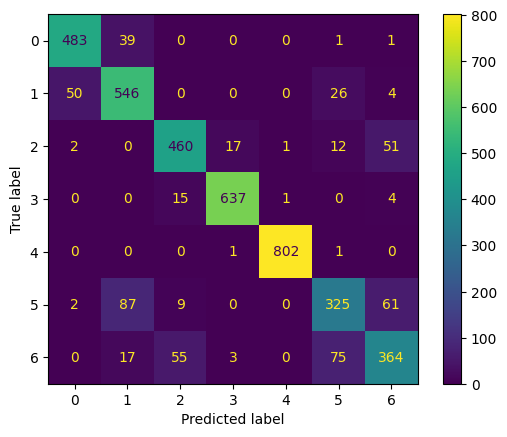

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest_org, ypred_ts_lb)
cfd = ConfusionMatrixDisplay(cf)
cfd.plot()

In [56]:
from sklearn.metrics import classification_report
print(classification_report(ytest_org, ypred_ts_lb))

                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.92      0.91       524
      Normal_Weight       0.79      0.87      0.83       626
     Obesity_Type_I       0.85      0.85      0.85       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.74      0.67      0.70       484
Overweight_Level_II       0.75      0.71      0.73       514

           accuracy                           0.87      4152
          macro avg       0.86      0.86      0.86      4152
       weighted avg       0.87      0.87      0.87      4152



### Perform Predictions for out of sample Data

In [57]:
xnew = pd.read_csv('test.csv')
xnew.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [58]:
xnew_pre = pre.transform(xnew)
xnew_pre.head()

,con__Age,con__Height,con__Weight,con__FCVC,con__NCP,con__CH2O,con__FAF,con__TUE,cat__Gender_Female,cat__Gender_Male,...,cat__SCC_no,cat__SCC_yes,cat__CALC_Frequently,cat__CALC_Sometimes,cat__CALC_no,cat__MTRANS_Automobile,cat__MTRANS_Bike,cat__MTRANS_Motorbike,cat__MTRANS_Public_Transportation,cat__MTRANS_Walking
0,0.537644,1.695675,1.241770,0.924049,0.338364,1.308584,-0.150721,-1.024344,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,-0.499620,-1.148152,-0.829748,-0.836279,-2.497077,1.595165,0.021775,-1.024344,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.379434,-0.651587,0.898933,1.039171,0.338364,0.973714,-1.171141,-0.608296,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.503267,-1.685011,0.598259,-0.836279,0.307045,1.244138,-1.057992,-1.024344,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.379434,-0.834373,0.642469,1.039171,0.338364,1.025738,-1.171141,0.206466,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


### Predict the Probability

In [60]:
probs = model.predict(xnew_pre)
probs

433/433 [==============================] - 1s 2ms/step


array([[5.4694075e-12, 5.2871067e-23, 6.7965719e-03, ..., 4.9914547e-06,
        9.5015856e-11, 1.6392997e-07],
       [4.2739281e-05, 1.4181524e-02, 1.6490310e-02, ..., 1.8185097e-05,
        9.2337102e-01, 4.5894697e-02],
       [2.0993017e-15, 5.4426575e-24, 1.9363349e-04, ..., 9.9980634e-01,
        8.4655053e-13, 3.5415184e-12],
       ...,
       [8.8064945e-01, 1.1713544e-01, 1.1728339e-10, ..., 1.4209586e-07,
        2.2149724e-03, 6.4873074e-10],
       [6.4924031e-02, 9.2338568e-01, 1.3493862e-08, ..., 2.5755487e-10,
        1.1689481e-02, 8.9220714e-07],
       [4.2547723e-13, 4.9605270e-25, 4.4448301e-03, ..., 6.3553631e-07,
        1.8851922e-11, 7.1185191e-08]], dtype=float32)

In [61]:
preds = np.argmax(probs, axis=1)
preds

array([3, 5, 4, ..., 0, 1, 3], dtype=int64)

In [62]:
preds_lb = ord.inverse_transform(pd.DataFrame([preds]).T)
preds_lb

array([['Obesity_Type_II'],
       ['Overweight_Level_I'],
       ['Obesity_Type_III'],
       ...,
       ['Insufficient_Weight'],
       ['Normal_Weight'],
       ['Obesity_Type_II']], dtype=object)

In [63]:
max_prob = np.max(probs, axis=1)
max_prob

array([0.9931982 , 0.923371  , 0.99980634, ..., 0.88064945, 0.9233857 ,
       0.9955545 ], dtype=float32)

### Save above results in Dataframe

In [66]:
df_final = xnew[['id']]
df_final.head()

,id
0,20758
1,20759
2,20760
3,20761
4,20762


In [74]:
df_final['Obesity_pred'] = preds_lb.flatten()
df_final['Prob'] = max_prob

In [75]:
df_final

,id,Obesity_pred,Prob
0,20758,Obesity_Type_II,0.993198
1,20759,Overweight_Level_I,0.923371
2,20760,Obesity_Type_III,0.999806
3,20761,Obesity_Type_I,0.797848
4,20762,Obesity_Type_III,0.998958
...,...,...,...
13835,34593,Overweight_Level_II,0.819347
13836,34594,Normal_Weight,0.832528
13837,34595,Insufficient_Weight,0.880649
13838,34596,Normal_Weight,0.923386


In [76]:
df_final['Obesity_pred'].value_counts()

Obesity_pred
Obesity_Type_III       2632
Normal_Weight          2254
Obesity_Type_II        2159
Obesity_Type_I         1991
Insufficient_Weight    1772
Overweight_Level_II    1707
Overweight_Level_I     1325
Name: count, dtype: int64

<Axes: xlabel='Obesity_pred'>

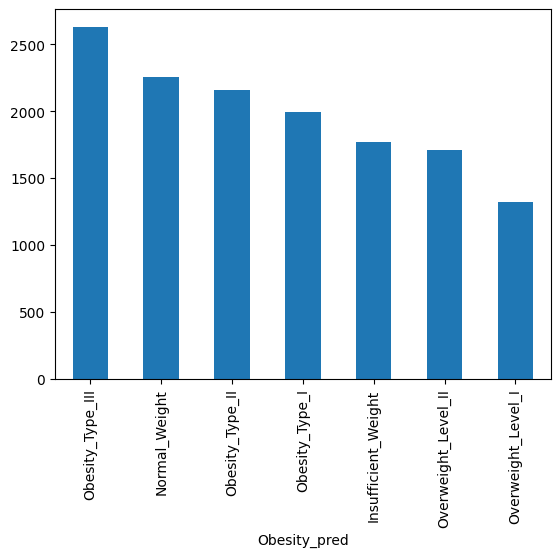

In [78]:
df_final['Obesity_pred'].value_counts().plot(kind='bar')

### Save above file in Results.csv

In [79]:
df_final.to_csv('Results.csv', index=False)